In [1]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 4.0 MB/s 
     |████████████████████████████████| 15.4 MB 35 kB/s 
     |████████████████████████████████| 6.3 MB 12.0 MB/s 


In [2]:
%cd '/content/drive/MyDrive/Colab Notebooks/new_project'

/content/drive/MyDrive/Colab Notebooks/new_project


In [3]:
!pip install git+https://github.com/pysal/spopt.git

  Cloning https://github.com/pysal/spopt.git to /tmp/pip-req-build-8l7a5tnn
  Running command git clone -q https://github.com/pysal/spopt.git /tmp/pip-req-build-8l7a5tnn
     |████████████████████████████████| 2.4 MB 4.2 MB/s 
     |████████████████████████████████| 41.2 MB 77 kB/s 
     |████████████████████████████████| 46 kB 2.9 MB/s 
     |████████████████████████████████| 95 kB 3.7 MB/s 
     |████████████████████████████████| 994 kB 65.9 MB/s 
  Created wheel for spopt: filename=spopt-0.1.2+100.g989763d-py3-none-any.whl size=81266 sha256=6ea8b99c73c5e9066a50b064753946468ca01f92b90edd895aa44c20418d9980
  Stored in directory: /tmp/pip-ephem-wheel-cache-67p04p7x/wheels/1a/3c/2f/822a93530f5b7bfdf06eeac6b21933664c686d4811720bd4b2
  Created wheel for esda: filename=esda-2.4.1-py3-none-any.whl size=117429 sha256=d64e09423cdfa5b9a3af6c20548af712d1c3929e98854243e319acc760f1a45f
  Stored in directory: /root/.cache/pip/wheels/ed/67/c5/4558a178be4c410f341c31f71b5aba9c761a40c9d17dbdfddd
Succe

In [4]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from matplotlib import font_manager 
import folium
from folium import GeoJson
from tqdm import tqdm
import math

In [5]:
from matplotlib.patches import Patch
import matplotlib.lines as mlines

dv_colors = list(matplotlib.colors.CSS4_COLORS)

def plot_results(model, facility_points):
    arr_points = []
    fac_sites = []
    
    for i in range(FACILITY_COUNT):
        if model.fac2cli[i]:

            geom = client_meter.iloc[model.fac2cli[i]]['geometry']
            arr_points.append(geom)
            fac_sites.append(i)

    fig, ax = plt.subplots(figsize=(30, 30))
    legend_elements = []

    street.plot(ax=ax, alpha=1, color='black', zorder=1)
    legend_elements.append(mlines.Line2D(
        [],
        [],
        color='black',
        label='streets',
    ))

    facility_points.plot(ax=ax, color='brown', marker="*", markersize=80, zorder=2)
    legend_elements.append(mlines.Line2D(
        [],
        [],
        color='brown',
        marker="*",
        linewidth=0,
        label=f'facility sites ($n$={FACILITY_COUNT})'
    ))

    for i in range(len(arr_points)):
        gdf = gpd.GeoDataFrame(arr_points[i])

        label = f"coverage_points by y{fac_sites[i]}"
        legend_elements.append(Patch(facecolor=dv_colors[i], edgecolor="k", label=label))

        gdf.plot(ax=ax, zorder=3, alpha=0.7, edgecolor="k", color=dv_colors[i], label=label)
        facility_points.iloc[[fac_sites[i]]].plot(ax=ax,
                                marker="*",
                                markersize=200 * 3.0,
                                alpha=0.8,
                                zorder=4,
                                edgecolor="k",
                                facecolor=dv_colors[i])
        
        legend_elements.append(mlines.Line2D(
            [],
            [],
            color=dv_colors[i],
            marker="*",
            ms=20 / 2,
            markeredgecolor="k",
            linewidth=0,
            alpha=0.8,
            label=f"y{fac_sites[i]} facility selected",
        ))

    plt.title("P-Median", fontweight="bold")
    plt.legend(handles = legend_elements, loc='upper left', bbox_to_anchor=(1.05, 1))

In [6]:
# !apt-get updata -qq
# !apt-get install fonts-nanum* -qq
# font_manager._rebuild()

In [7]:
gu = '영등포구'

In [8]:
looc = pd.read_csv('%s_looc.csv'%(gu))
sioc = pd.read_csv('%s_sioc.csv'%(gu))
boundary = gpd.read_file('../big/HangJeongDong_ver20210401.geojson')

In [9]:
looc.drop(columns=['Unnamed: 0'], inplace=True)
sioc.drop(columns=['Unnamed: 0'], inplace=True)

In [10]:
boundary = boundary[boundary.sggnm == gu]

In [11]:
counts = []
for i in np.unique(sioc.상권업종대분류명):
  counts.append(sioc[sioc.상권업종대분류명 == i].shape[0])
rank_dae = pd.DataFrame(data=counts, index=np.unique(sioc.상권업종대분류명), columns=['ranking'])
rank_dae = rank_dae.rank()
rank_dae = rank_dae.T

In [12]:
rank_dae

,관광/여가/오락,부동산,생활서비스,소매,숙박,스포츠,음식,학문/교육
ranking,2.0,5.0,6.0,7.0,3.0,1.0,8.0,4.0


In [13]:
for i in sioc.index:
  dae = sioc.loc[i, '상권업종대분류명']
  sioc.loc[i, 'weights'] = rank_dae.loc['ranking', dae]
sioc

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도,geometry,weights
0,17174062,호구의주방,NaN,D,소매,D07,가정/주방/인테리어,D07A17,주방가구판매,G47520,가구 소매업,11,서울특별시,11560,영등포구,1156062000,양평2동,1156012800,양평동4가,1156012800201600002,1,대지,160,2.0,서울특별시 영등포구 양평동4가 160-2,115603005074,서울특별시 영등포구 선유로,269,NaN,1156012800101600002019768,약산상가아파트,서울특별시 영등포구 선유로 269,150867,7206.0,NaN,NaN,NaN,126.897892,37.536700,POINT (126.897892334224 37.53670021130171),7.0
1,23324279,제중건강원,NaN,D,소매,D10,건강/미용식품,D10A07,건강원,G47216,건강보조식품 소매업,11,서울특별시,11560,영등포구,1156053500,영등포동,1156010600,영등포동5가,1156010600200410001,1,대지,41,1.0,서울특별시 영등포구 영등포동5가 41-1,115604154799,서울특별시 영등포구 영중로14길,11,17.0,1156010600100410002034626,NaN,서울특별시 영등포구 영중로14길 11-17,150035,7250.0,NaN,1,NaN,126.907168,37.520613,POINT (126.907167758086 37.5206127169276),7.0
2,20700645,씨지브이영등포골드클래스,NaN,Q,음식,Q07,패스트푸드,Q07A04,패스트푸드,I56199,그외 기타 음식점업,11,서울특별시,11560,영등포구,1156053500,영등포동,1156010500,영등포동4가,1156010500204420000,1,대지,442,NaN,서울특별시 영등포구 영등포동4가 442,115603118024,서울특별시 영등포구 영중로,15,NaN,1156010500104420000000001,타임스퀘어,서울특별시 영등포구 영중로 15,150034,7305.0,441,6,NaN,126.903914,37.517213,POINT (126.903914224263 37.51721266610571),8.0
3,24651663,천일센타,NaN,F,생활서비스,F14,자동차/이륜차,F14A01,자동차정비/카센타,NaN,NaN,11,서울특별시,11560,영등포구,1156053500,영등포동,1156010300,영등포동2가,1156010300200940121,1,대지,94,121.0,서울특별시 영등포구 영등포동2가 94-121,115603118010,서울특별시 영등포구 버드나루로,47,NaN,1156010300100940121033790,고촌빌딩,서울특별시 영등포구 버드나루로 47,150901,7249.0,NaN,NaN,NaN,126.910825,37.522728,POINT (126.910824909122 37.5227279099782),6.0
4,28483239,오메가,NaN,Q,음식,Q03,일식/수산물,Q03A02,음식점-일식,I56113,일식 음식점업,11,서울특별시,11560,영등포구,1156051500,영등포본동,1156010100,영등포동,1156010100206180496,1,대지,618,496.0,서울특별시 영등포구 영등포동 618-496,115603000028,서울특별시 영등포구 경인로,846,NaN,1156010100106180501000001,영등포민자역사,서울특별시 영등포구 경인로 846,150899,7306.0,NaN,NaN,NaN,126.907647,37.515661,POINT (126.907647192475 37.51566141404),8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6192,22486061,용한철학관,NaN,F,생활서비스,F11,개인서비스,F11A02,운명감정작명,S96992,점술 및 유사 서비스업,11,서울특별시,11560,영등포구,1156053500,영등포동,1156010400,영등포동3가,1156010400200190000,1,대지,19,NaN,서울특별시 영등포구 영등포동3가 19,115604154721,서울특별시 영등포구 영등포로42길,17,NaN,1156010400100190000035306,NaN,서울특별시 영등포구 영등포로42길 17,150033,7304.0,NaN,NaN,NaN,126.906732,37.517924,POINT (126.906731867053 37.517923574391),6.0
6193,28000128,당성행복한홈스쿨,NaN,R,학문/교육,R09,학원기타,R09A01,학원(종합),P85501,일반 교과 학원,11,서울특별시,11560,영등포구,1156055000,당산1동,1156011100,당산동1가,1156011100201850024,1,대지,185,24.0,서울특별시 영등포구 당산동1가 185-24,115604154100,서울특별시 영등포구 당산로16길,25,NaN,1156011100101850024030211,NaN,서울특별시 영등포구 당산로16길 25,150800,7265.0,NaN,NaN,NaN,126.898723,37.522526,POINT (126.898723089573 37.5225255779952),4.0
6194,22749599,가전제활용센타,NaN,D,소매,D24,중고품소매/교환,D24A03,중고가전가구,NaN,NaN,11,서울특별시,11560,영등포구,1156058500,도림동,1156011800,도림동,1156011800202430003,1,대지,243,3.0,서울특별시 영등포구 도림동 243-3,115603116010,서울특별시 영등포구 도림로,347,NaN,1156011800102430003025705,NaN,서울특별시 영등포구 도림로 347,150833,7374.0,NaN,1,NaN,126.900101,37.508014,POINT (126.900101327189 37.50801360638),7.0
6195,24981075,조일과학,NaN,D,소매,D08,사무/문구/컴퓨터,D08A01,사무/문구용품,G47612,문구용품 소매업,11,서울특별시,11560,영등포구,1156055000,당산1동,1156011100,당산동1가,1156011100200090001,1,대지,9,1.0,서울특별시 영등포구 당산동1가 9-1,115604154708,서울특별시 영등포구 영등포로28길,5,NaN,1156011100100090001037314,당산동코오롱주상복합아파트,서울특별시 영등포구 영등포로28길 5,150800,7292.0,NaN,2,NaN,126.899236,37.519971,POINT (126.899235755589 37.5199713976062),7.0


In [14]:
from spopt.locate import PMedian, LSCP
import pulp
import spaghetti

/usr/local/lib/python3.7/dist-packages/spaghetti/network.py:36: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(f"{dep_msg}", FutureWarning)


In [15]:
facility = looc[['경도','위도']]
facility = gpd.GeoDataFrame(data = facility, geometry=gpd.points_from_xy(facility.경도, facility.위도), crs='epsg:4326')
facility = facility.reset_index(drop=True)
client = gpd.GeoDataFrame(data = sioc[['경도','위도']], geometry=gpd.points_from_xy(sioc.경도, sioc.위도), crs='epsg:4326')
client = client.reset_index(drop=True)
facility_meter = facility.to_crs(epsg=5186)
client_meter = client.to_crs(epsg=5186)
boundary_meter = boundary.to_crs(epsg=5186)

ntw = spaghetti.Network(in_data=boundary_meter)
street = spaghetti.element_as_gdf(ntw, arcs=True)
ntw.snapobservations(client_meter[['geometry']], "clients", attribute=True)
clients_snapped = spaghetti.element_as_gdf(ntw, pp_name="clients", snapped=True)
ntw.snapobservations(facility_meter[['geometry']], "facilities", attribute=True)
facilities_snapped = spaghetti.element_as_gdf(ntw, pp_name="facilities", snapped=True)

        # Calculate the cost matrix

cost_matrix = ntw.allneighbordistances(sourcepattern=ntw.pointpatterns["clients"], 
                                       destpattern=ntw.pointpatterns["facilities"])

In [16]:
# lscp_from_cost_matrix = LSCP.from_cost_matrix(cost_matrix, max_coverage=100)
# lscp_from_cost_matrix = lscp_from_cost_matrix.solve(pulp.PULP_CBC_CMD(msg=False))

In [17]:
# lscp_from_cost_matrix.facility_client_array()
# lscp_from_cost_matrix.fac2cli

In [18]:
# # facility_meter['fac2cli_1'] = lscp_from_cost_matrix.fac2cli
# p = len(np.unique(lscp_from_cost_matrix.fac2cli)) - 1
# p

In [19]:
clients_snapped['weights'] = list(sioc.weights)

In [20]:
solver = pulp.PULP_CBC_CMD(msg=False)

In [21]:
lscp_from_geodataframe = LSCP.from_geodataframe(clients_snapped, facilities_snapped, "geometry", "geometry", max_coverage=100, distance_metric="euclidean")
lscp_from_geodataframe = lscp_from_geodataframe.solve(solver)

lscp_from_geodataframe.facility_client_array()
lscp_from_geodataframe.fac2cli

[[],
 [],
 [],
 [],
 [292,
  503,
  652,
  1372,
  1402,
  1849,
  1866,
  1908,
  2230,
  2353,
  2365,
  2466,
  2504,
  2535,
  2542,
  2732,
  2775,
  2909,
  2984,
  3074,
  3130,
  3143,
  3452,
  3575,
  3603,
  4053,
  4367,
  4422,
  4424,
  4643,
  4966,
  5159,
  5169,
  5527,
  5559,
  5639,
  5729,
  5774,
  5814,
  5837,
  5868,
  5933],
 [],
 [],
 [],
 [],
 [52,
  86,
  146,
  175,
  291,
  372,
  381,
  421,
  487,
  559,
  633,
  639,
  680,
  784,
  1002,
  1053,
  1078,
  1283,
  1285,
  1628,
  1644,
  1675,
  1720,
  1835,
  2102,
  2152,
  2264,
  2342,
  2363,
  2399,
  2445,
  2710,
  2765,
  2888,
  3049,
  3133,
  3339,
  3412,
  3544,
  3547,
  3566,
  3735,
  3738,
  3752,
  3763,
  3846,
  3875,
  3942,
  3958,
  3977,
  4041,
  4219,
  4244,
  4345,
  4454,
  4678,
  4773,
  4827,
  4908,
  5006,
  5067,
  5148,
  5167,
  5241,
  5325,
  5352,
  5353,
  5404,
  5539,
  5572,
  5694,
  5712,
  5775,
  5841,
  6160,
  6169],
 [],
 [],
 [],
 [],
 [],
 [],
 []

In [22]:
p = len(np.unique(lscp_from_geodataframe.fac2cli)) - 1
p

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


30

In [23]:
pmedian_from_geodataframe = PMedian.from_geodataframe(clients_snapped, facilities_snapped,"geometry","geometry","weights",p_facilities=p,distance_metric="euclidean")
pmedian_from_geodataframe = pmedian_from_geodataframe.solve(solver)
pmedian_from_geodataframe.facility_client_array()
pmedian_from_geodataframe.fac2cli

[[85,
  220,
  275,
  572,
  602,
  611,
  613,
  620,
  709,
  735,
  844,
  861,
  863,
  1045,
  1073,
  1113,
  1118,
  1120,
  1132,
  1154,
  1220,
  1225,
  1249,
  1432,
  1509,
  1513,
  1603,
  1679,
  1726,
  1738,
  1821,
  1899,
  1962,
  1991,
  2035,
  2040,
  2071,
  2176,
  2182,
  2294,
  2377,
  2383,
  2404,
  2412,
  2458,
  2599,
  2643,
  2693,
  2713,
  2736,
  2740,
  2769,
  2781,
  2804,
  2808,
  2817,
  2855,
  2898,
  2915,
  2974,
  2977,
  3061,
  3204,
  3341,
  3373,
  3401,
  3410,
  3517,
  3578,
  3597,
  3611,
  3667,
  3679,
  3706,
  3854,
  3863,
  3886,
  3894,
  3952,
  3997,
  4111,
  4233,
  4236,
  4351,
  4522,
  4930,
  4949,
  5046,
  5051,
  5077,
  5181,
  5224,
  5229,
  5247,
  5340,
  5443,
  5478,
  5489,
  5564,
  5668,
  5671,
  5681,
  5734,
  5793,
  5828,
  5852,
  5914,
  5920,
  5922,
  5936,
  6053,
  6094,
  6105,
  6107,
  6125,
  6128,
  6140],
 [],
 [],
 [29,
  82,
  88,
  143,
  149,
  150,
  168,
  191,
  199,
  221,


In [24]:
FACILITY_COUNT = facility_meter.shape[0]

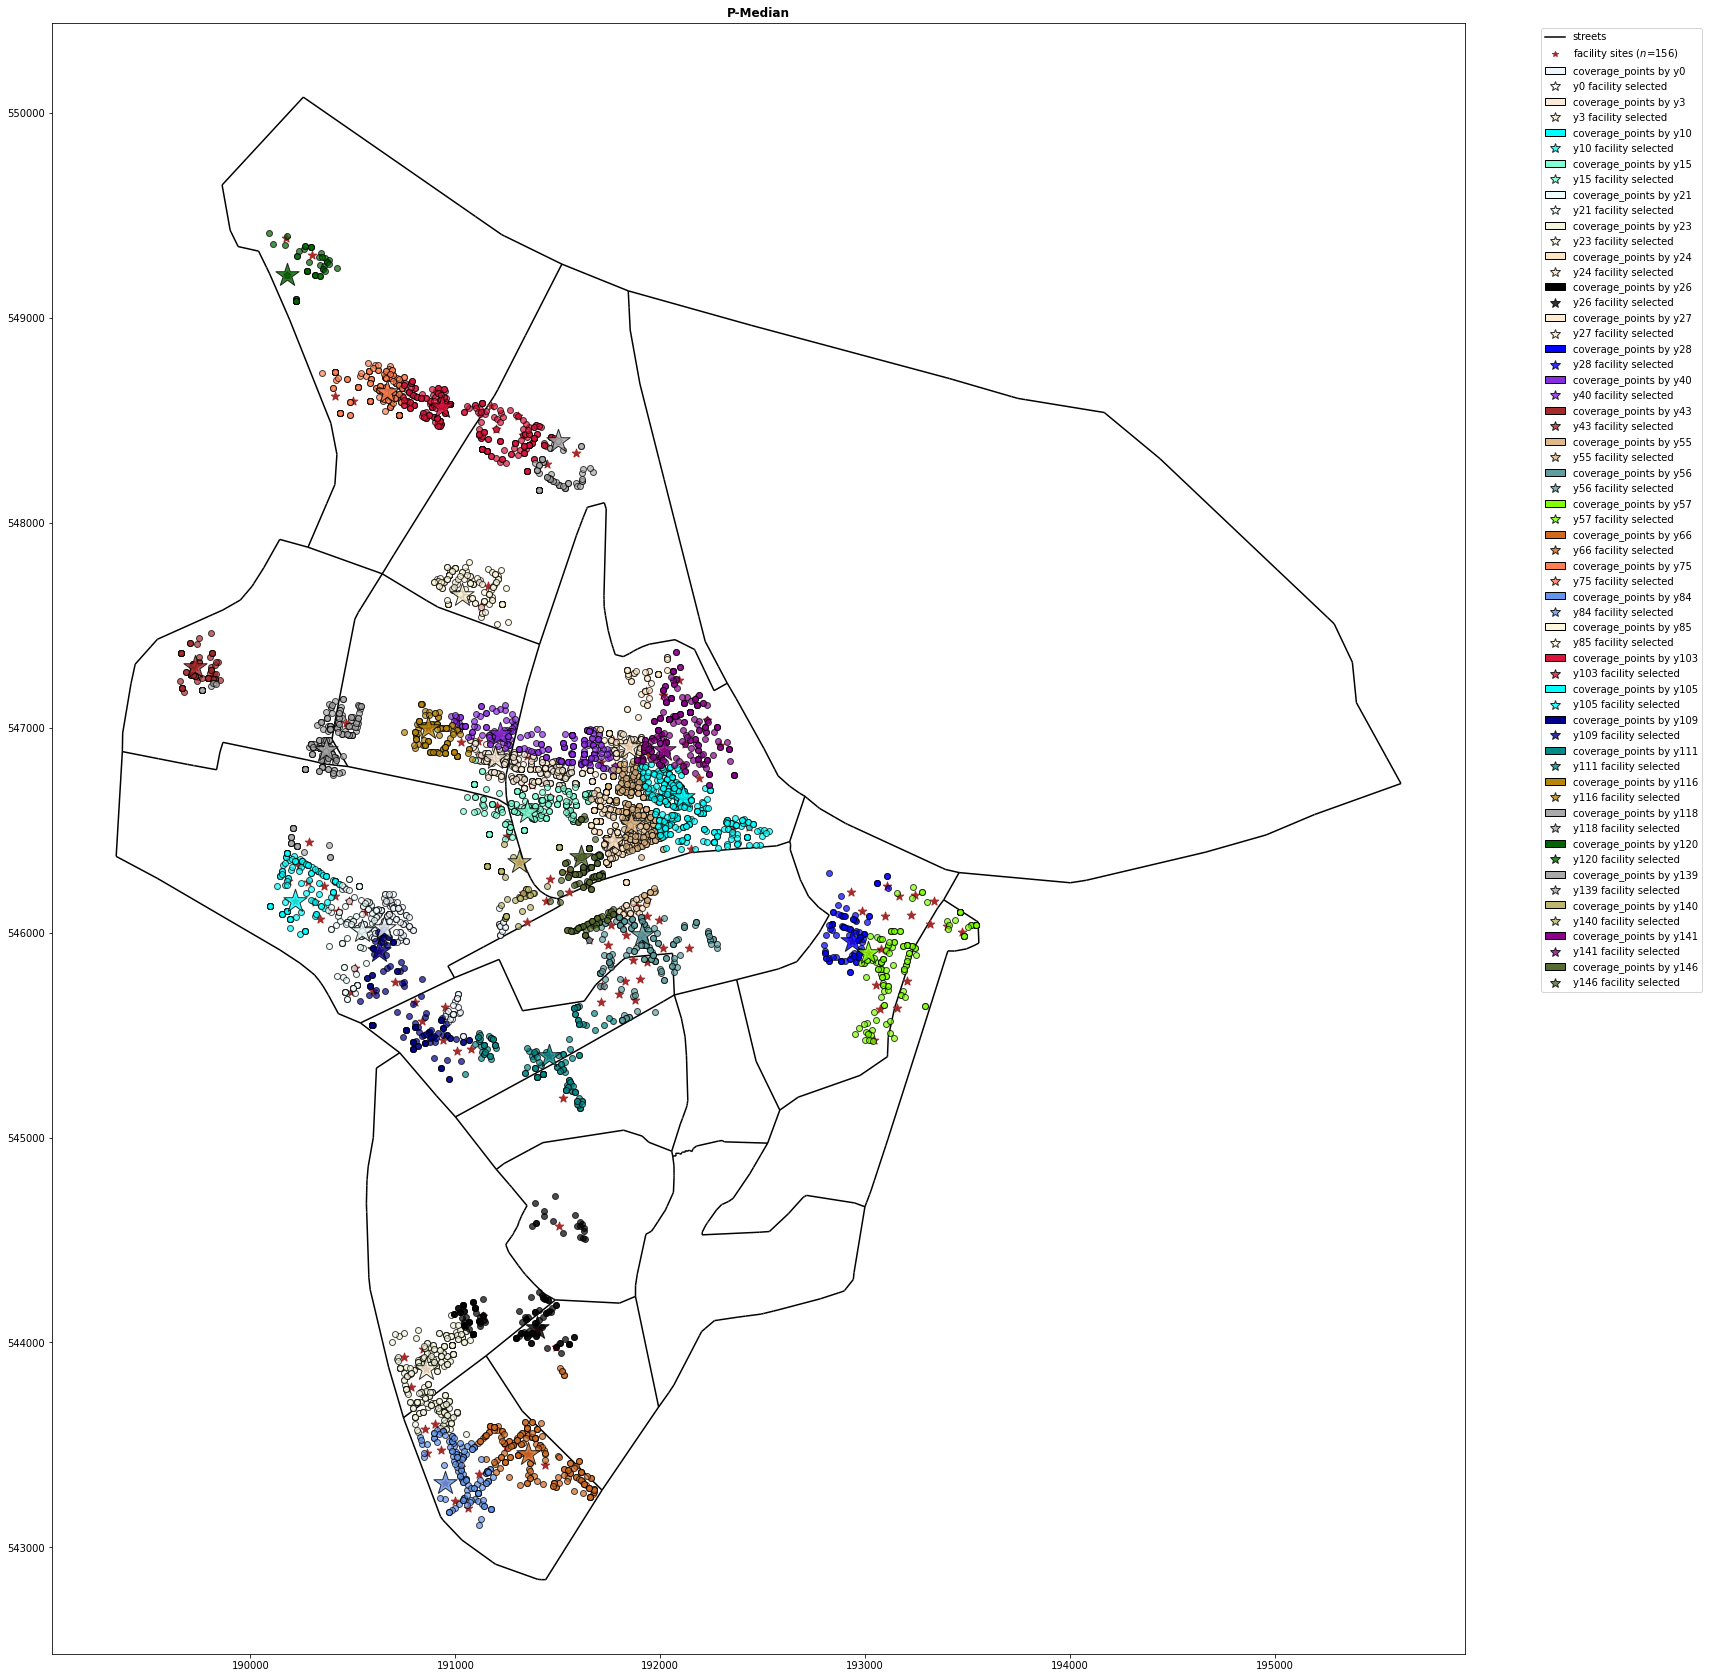

In [25]:
plot_results(pmedian_from_geodataframe, facility_meter)

In [26]:
facility_meter['last'] = pmedian_from_geodataframe.fac2cli
none_idx = []
for i, x in facility_meter.iterrows():
  if len(facility_meter.loc[i, 'last']) == 0:
    none_idx.append(i)
len(none_idx)

126

In [27]:
ch_fac = facility_meter.drop(index=none_idx)
ch_fac

,경도,위도,geometry,last
0,126.894260,37.513649,POINT (190651.610 546024.220),"[85, 220, 275, 572, 602, 611, 613, 620, 709, 7..."
3,126.900404,37.521110,POINT (191195.650 546851.670),"[29, 82, 88, 143, 149, 150, 168, 191, 199, 221..."
10,126.889352,37.514827,POINT (190217.860 546155.460),"[9, 86, 111, 146, 258, 291, 343, 348, 388, 535..."
15,126.902147,37.518723,POINT (191349.460 546586.660),"[31, 48, 59, 66, 97, 122, 137, 152, 219, 232, ..."
21,126.893075,37.513522,POINT (190546.810 546010.270),"[52, 107, 136, 139, 167, 175, 352, 368, 372, 3..."
23,126.896595,37.494249,POINT (190855.640 543870.880),"[74, 100, 106, 127, 169, 178, 201, 216, 233, 2..."
24,126.906903,37.517488,POINT (191769.790 546449.100),"[4, 6, 10, 11, 14, 17, 21, 25, 26, 39, 40, 42,..."
26,126.902739,37.496074,POINT (191399.210 544072.830),"[15, 58, 72, 73, 87, 174, 236, 248, 340, 418, ..."
27,126.907768,37.521614,POINT (191846.720 546906.990),"[12, 57, 182, 323, 341, 378, 379, 405, 409, 44..."
28,126.920113,37.513086,POINT (192937.220 545959.500),"[13, 151, 204, 224, 480, 609, 634, 744, 903, 9..."


In [28]:
MM = folium.Map(location=[37.56, 126.99], zoom_start=12)
folium.Choropleth(geo_data=boundary, key_on='feature.properties.adm_nm', fill_color='YlGnBu').add_to(MM) #fill_color='YlGnBu', 'PuRd', 'YlOrR
for _, row in ch_fac.iterrows():
  folium.Marker([row['위도'], row['경도']]).add_to(MM)
MM

In [29]:
csv_fac = looc.iloc[list(ch_fac.index), :]
csv_fac = looc.loc[csv_fac.index, :]
csv_fac.to_csv('%s_최종입지.csv'%(gu))